C:\Users\15592\AppData\Local\Temp\ipykernel_17524\3497533608.py:46: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


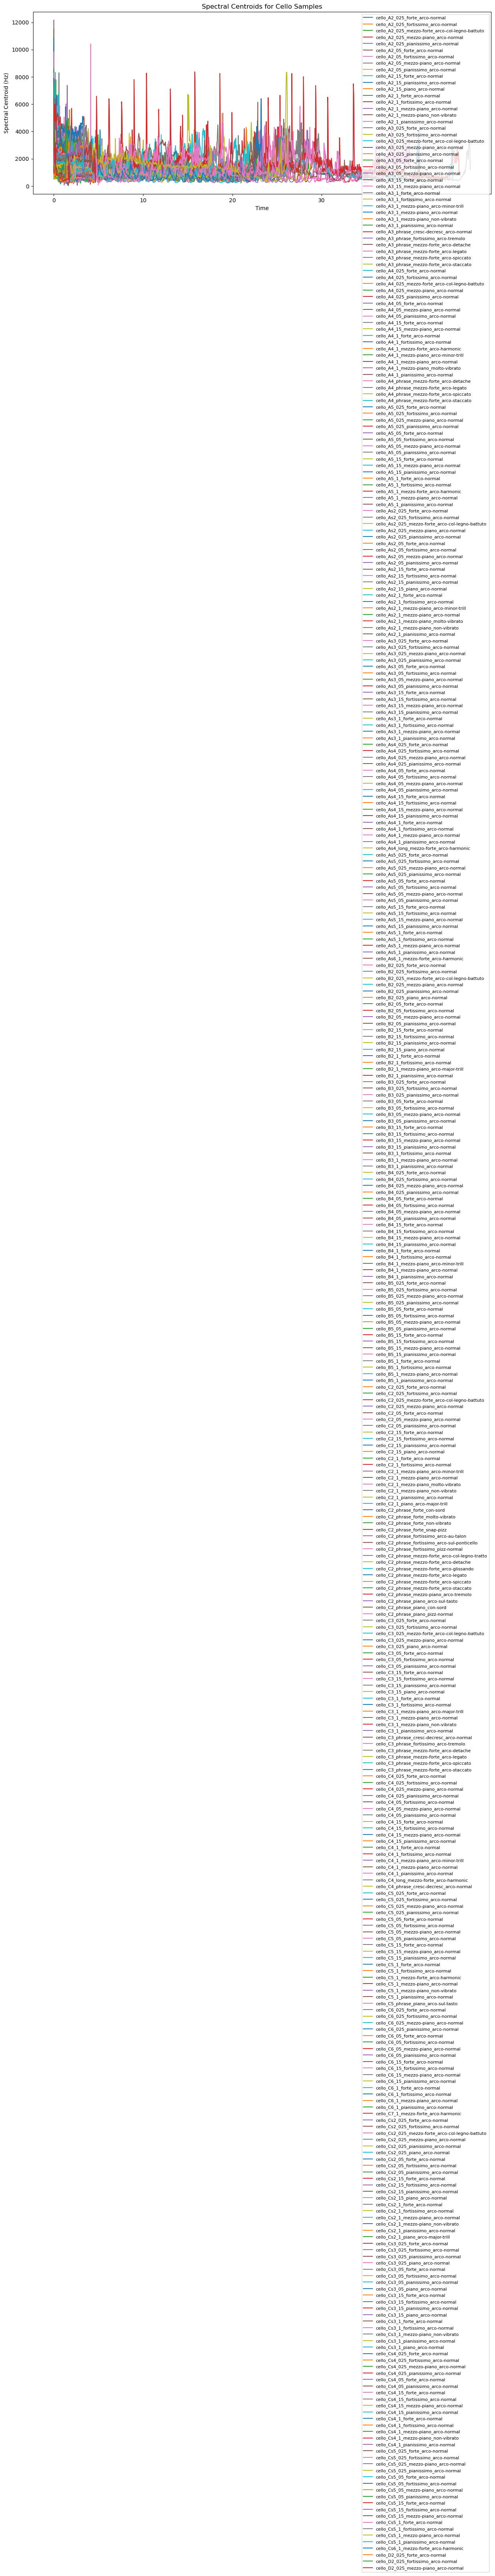

In [23]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

BASE_PATH = os.path.join("data", "all-samples")
path = os.path.join(BASE_PATH, '')

def get_instruments_path(path, instrument_name):
    instrument_path = os.path.join(path, instrument_name)
    if not os.path.exists(instrument_path):
        raise ValueError(f'Instrument folder not found: {instrument_path}')
    
    instrument_files = [f for f in os.listdir(instrument_path) if f.endswith(('.wav', '.mp3'))]
    return instrument_path, instrument_files

def compute_centroids(path, instrument_name):
    instrument_path, instrument_files = get_instruments_path(path, instrument_name)
    data = {}

    for file in instrument_files:
        try:
            file_path = os.path.join(instrument_path, file)
            y, sr = librosa.load(file_path, sr=None)
            centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            label = os.path.splitext(file)[0]
            data[label] = centroid
        except Exception as e:
            print(f"Error with {file}: {e}")
            continue
    return data

def plot_centroids_together(path, instrument_name):
    data = compute_centroids(path, instrument_name)
    plt.figure(figsize=(15, 6))
    plt.xlabel("Time")
    plt.ylabel("Spectral Centroid (Hz)")
    plt.title(f"Spectral Centroids for {instrument_name.capitalize()} Samples")

    for label, centroid in data.items():
        times = librosa.times_like(centroid)
        plt.plot(times, centroid.T, label=label)

    plt.legend(loc="upper right", fontsize=8)
    plt.tight_layout()
    plt.show()

# --- Run it! ---
plot_centroids_together(path, 'cello')
